In [1]:
import matplotlib.pyplot as plt
from view import *

In [3]:
attributions1 = ["t1", "t2"]
durations1 = ["1:10", "0:15"]


attributions2 = ["t1", "t3"]
durations2 = ["0:35", "0:20"]

attributions3=[]
durations3=[]


In [4]:
attributions_lists = []
attributions_lists.append(attributions1)
attributions_lists.append(attributions2)
attributions_lists.append(attributions3)

durations_lists = []
durations_lists.append(durations1)
durations_lists.append(durations2)
durations_lists.append(durations3)
attributions_lists, durations_lists

([['t1', 't2'], ['t1', 't3'], []], [['1:10', '0:15'], ['0:35', '0:20'], []])

In [2]:
def consolidate_attributions_and_durations_lists(attributions_lists, durations_lists):
    all_attributions = []
    all_durations = []

    for att_l_idx, att_list in enumerate(attributions_lists):  # att_l_idx indexes the day corresponding to the attribution list
        for it_idx, it in enumerate(att_list):  # for each item in that attribution list
            try:  # if the current item (it) is already in the all_attribution list
                idx = all_attributions.index(it)
                it_dur = durations_lists[att_l_idx][it_idx]
                all_durations[idx] += str_to_timedelta(it_dur)
#                 print("try", all_attributions, all_durations)
            except ValueError:  #  else
                all_attributions.append(it)
                it_dur = durations_lists[att_l_idx][it_idx]
                all_durations.append(str_to_timedelta(it_dur))
#                 print("except", all_attributions, all_durations)

    return all_attributions, all_durations

In [5]:
consolidate_attributions_and_durations_lists(attributions_lists, durations_lists)

(['t1', 't2', 't3'],
 [datetime.timedelta(seconds=6300),
  datetime.timedelta(seconds=900),
  datetime.timedelta(seconds=1200)])

In [10]:
3600+45*60  # 1h45m

6300

(<Figure size 1080x360 with 1 Axes>,
 <AxesSubplot:title={'center':'Week Mon 2021-05-03 - Sun 2021-05-09: 61.4h logged'}, ylabel='Hours'>)

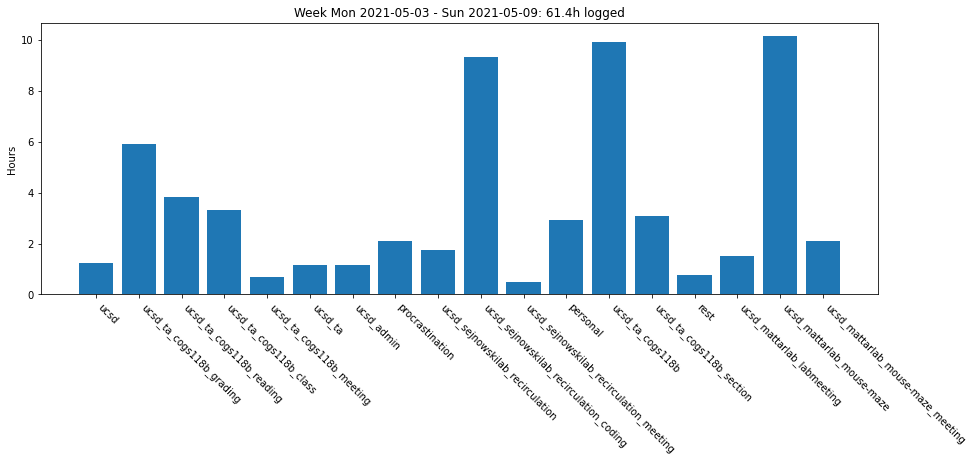

In [4]:
def get_week_range(day):
    """Get all days in a week. Starting from Monday, ending in Sunday
    :param (datetime.date) day
    :return: list of datetime.dates"""
    str_input_date = day.strftime(DATE_FORMAT_YMD)

    input_date = datetime.datetime.strptime(str_input_date, DATE_FORMAT_YMD).date()
    weeks = 1

    one_day = timedelta(days=1)
    last_monday = input_date + timedelta(days=-input_date.weekday())  # takes the monday before the given date
    for w in range(weeks):
        wk_monday = last_monday + timedelta(days=-7*w)
#         print("Mon", wk_monday, "- Sun", wk_monday+timedelta(days=+6))
        wk_range = [(wk_monday + i*one_day) for i in range(7)] 
    return wk_range


def get_attributions_and_durations(strdate):
    """
    Get attributions and their durations for the given strdate
    strdate: date of the day from which to get the attributions and their durations
    return: attributions list, and a durations list
    """
    try:
        with open(join(JOURNALS_FOLDER, strdate+TXT_FORMAT), 'r', encoding=UTF8_ENCODING) as f:
            daily_journal = f.read().strip()
    except FileNotFoundError as e:
        # if file is not found, return empty lists
        return [],[]

    duration_attribution_list = re.findall('\^T([a-zA-Z0-9_-]+)=(\d?\d:\d\d)', daily_journal)  #TODO: include format 2.5 (for 2.5 hours = 2:30)

    attributions = []
    durations = []                                                                                                                                                                                      
    for item in duration_attribution_list:
        attributions.append(item[0])
        durations.append(item[1])
    
    return attributions, durations


def get_attributions_and_durations_from_range(strdate_range):
    """
    Get week for which day `dt` (datetime.date) belongs and return consolidated attributions and corresponding durations
    @param strdate_range: list of dates
    @return: atts: list of attributions 
             durs_in_h (list of float): duration in hours
    """
    attributions_lists = []
    durations_lists = []
    for day in str_wk_range:
        attributions, durations = get_attributions_and_durations(day)
        attributions_lists.append(attributions)
        durations_lists.append(durations)
    atts, durs = consolidate_attributions_and_durations_lists(attributions_lists, durations_lists)
    durs_in_h = array([dur.seconds/3600 for dur in durs])
    return atts, durs_in_h

    
def plot_wk_all_activities(atts, durs_in_h, str_monday, str_sunday):
    plt.figure(figsize=(15,5))
    plt.bar(range(len(durs_in_h)), durs_in_h, tick_label=atts)
    plt.xticks(rotation=-45, ha="left");
    plt.ylabel("Hours")
    str_monday = str_wk_range[0]
    str_sunday = str_wk_range[-1]
    plt.title("Week Mon %s - Sun %s: %.1fh logged" % (str_monday, str_sunday, sum(durs_in_h)))
    return plt.gcf(), plt.gca()


# target_day = datetime.date.today()
target_day = datetime.date(2021,5,9)  
str_wk_range = [str(day) for day in get_week_range(target_day)]
atts, durs_in_h = get_attributions_and_durations_from_range(str_wk_range)

plot_wk_all_activities(atts, durs_in_h, str_wk_range[0], str_wk_range[-1])

In [6]:
len(atts), atts, durs_in_h

(18,
 ['ucsd',
  'ucsd_ta_cogs118b_grading',
  'ucsd_ta_cogs118b_reading',
  'ucsd_ta_cogs118b_class',
  'ucsd_ta_cogs118b_meeting',
  'ucsd_ta',
  'ucsd_admin',
  'procrastination',
  'ucsd_sejnowskilab_recirculation',
  'ucsd_sejnowskilab_recirculation_coding',
  'ucsd_sejnowskilab_recirculation_meeting',
  'personal',
  'ucsd_ta_cogs118b',
  'ucsd_ta_cogs118b_section',
  'rest',
  'ucsd_mattarlab_labmeeting',
  'ucsd_mattarlab_mouse-maze',
  'ucsd_mattarlab_mouse-maze_meeting'],
 array([ 1.25      ,  5.91666667,  3.83333333,  3.33333333,  0.66666667,
         1.16666667,  1.16666667,  2.08333333,  1.75      ,  9.33333333,
         0.5       ,  2.91666667,  9.91666667,  3.08333333,  0.75      ,
         1.5       , 10.16666667,  2.08333333]))

## Aggregate plot

Text(0.5, 1.0, 'Week 2021-05-03 - 2021-05-09')

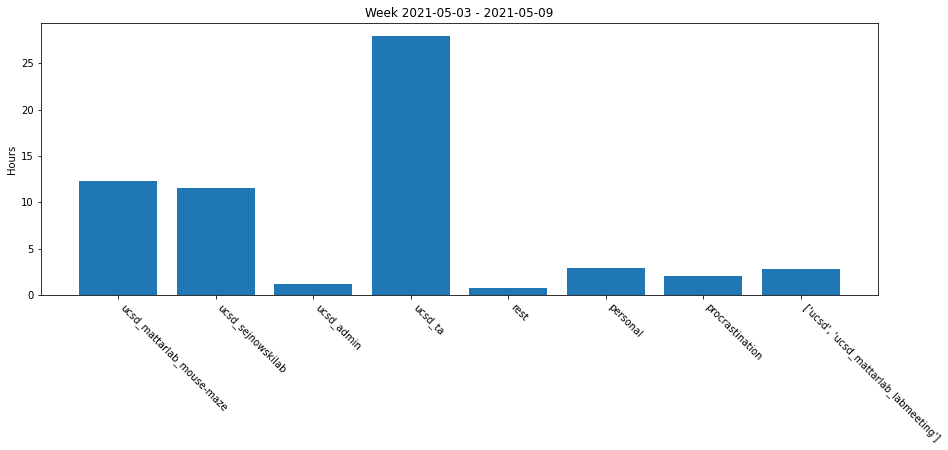

In [5]:
import re

TAGS = ["ucsd_proj", "ucsd_mattarlab_mouse-maze", "ucsd_sejnowskilab",  # research
          "ucsd_class", "ucsd_course", "ucsd_book-club", "ucsd_yu-jc", "ucsd_talk",  # courses
          "ucsd_admin", "ucsd_email", "ucsd_ta", "ucsd_tech",  # bureaucracy
          "sideways-investigation",
          "rest", "personal", "procrastination", "maiseducacao"]  # non-productive

tag_durs = []
for tag in TAGS:
#     print(tag)
    match_indices = []
    for i_att, att in enumerate(atts):  # TODO: rename atts to atts_in_date_range
        match_indices.append(i_att) if re.search(tag, att) else None
    match_indices = array(match_indices)
#     print(match_indices)

    if len(match_indices)>0:
        tag_durs.append(sum(durs_in_h[match_indices]))  # sum all attribution durations of attributions matching current tag
    else:
        tag_durs.append(0)

# others
others = []
others_durs = []
for i_att, att in enumerate(atts):
    no_matching_tag = True
    for tag in TAGS:  # check if there is a tag that matches the current attribution
        if re.search(tag, att):
            no_matching_tag = False
    if no_matching_tag:
        others.append(att)
        others_durs.append(durs_in_h[i_att])

# print(others)
# print(others_durs)
        
#  remove bars of items with zero hours
non_zero_idxs = where(array(tag_durs)!=0)
non_zero_tags = array(TAGS)[non_zero_idxs]
non_zero_durs = array(tag_durs)[non_zero_idxs]

# match_indices#, tag_durs
plt.figure(figsize=(15,5))
plt.bar(range(len(non_zero_tags)+1), list(non_zero_durs)+[sum(others_durs)], tick_label=list(non_zero_tags)+[str(others)])
# plt.bar(range(len(tag_durs)+1), [dur for dur in tag_durs]+[sum(others_durs)], tick_label=TAGS+[str(others)])
plt.xticks(rotation=-45, ha="left");
plt.ylabel("Hours")
str_monday = str_wk_range[0]
str_sunday = str_wk_range[-1]
plt.title("Week %s - %s" % (str_monday, str_sunday))

In [28]:
non_zero_idxs = where(array(tag_durs)!=0)
array(tag_durs)[non_zero_idxs], array(TAGS)[non_zero_idxs]

(array([12.25      , 11.58333333,  1.16666667, 27.91666667,  0.75      ,
         2.91666667,  2.08333333]),
 array(['ucsd_mattarlab_mouse-maze', 'ucsd_sejnowskilab', 'ucsd_admin',
        'ucsd_ta', 'rest', 'personal', 'procrastination'], dtype='<U25'))

In [32]:
list(non_zero_durs)#+[sum(others_durs)]

[12.25,
 11.583333333333334,
 1.1666666666666667,
 27.916666666666664,
 0.75,
 2.9166666666666665,
 2.0833333333333335]

In [13]:
non_zero_durations = [dur for dur in tag_durs if dur!=0]
non_zero_durations

[12.25,
 11.583333333333334,
 1.1666666666666667,
 27.916666666666664,
 0.75,
 2.9166666666666665,
 2.0833333333333335]

todo
* substitute aggregate bars with stacked bars for each inner category
* hide bars with no working hours
* show percentage of research
* create function to call in view.py

In [80]:
sum(tag_durs)

41.66666666666667

# Hierarchical plot

In [41]:
# l = zeros(len(atts), "str")
lvl_1 = []
for i_att, att in enumerate(atts):
    print(att.split('_')[0])
    lvl_1.append(att.split('_')[0])
#     l[i_att] = att.split('_')[0]
    
indices = [i for i, x in enumerate(lvl_1) if x == "ucsd"]  # get all attributions indices for which the 1st level is ucsd

sum(array(durs)[array(indices)])  # sum the durations for the chosen indices


procrastination
ucsd
ucsd
ucsd
ucsd
ucsd
ucsd
ucsd
ucsd
ucsd
ucsd
maiseducacao
personal
rest
ucsd
ucsd
ucsd
ucsd
ucsd
ucsd
ucsd
ucsd
ucsd
ucsd
ucsd
ucsd
ucsd


datetime.timedelta(days=1, seconds=62700)